<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

### <b> Student 1:</b> NGUYEN Minh Duc 
### <b> Student 2:</b> THAN Thanh An
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

In [68]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

lambda_ = 1
w1 = np.array([[0.3,0.8,0.2], [-0.5,0.2,-0.4]])
w2 = np.array([-0.6,0.4,0.5])
x0 = np.array([0.8,0.2,1])

x1 = np.append(sigmoid(np.dot(w1,x0)),1)
x2 = y = sigmoid(np.dot(w2,x1))

dEdu5= (-0.4+y)*y*(1-y)
w2_n = w2 - lambda_*dEdu5*x1

dx1 = x1*(1-x1)
dEdu34 = dEdu5*w2*x1*(1-x1)
dEdw_1 = dEdu34[0]*x0
dEdw_2 = dEdu34[1]*x0

w1_n = w1 - lambda_*np.append([dEdw_1],[dEdw_2],axis=0) 

print("update w2: ", w2_n)
print("update w1: ", w1_n)

('update w2: ', array([-0.62541468,  0.38745727,  0.46063746]))
('update w1: ', array([[ 0.30432265,  0.80108066,  0.20540332],
       [-0.50273473,  0.19931632, -0.40341841]]))


#Your answer goes here :

$w_{1,3}=  0.304341 $ 

$w_{1,4}= -0.5027262 $

$w_{2,3}= 0.8010852 $

$w_{2,4}=  0.19933776 $

$w_{6,3}= 0.20563219 $

$w_{6,4}= -0.4034077 $

$w_{3,5}= -0.6254147 $

$w_{4,5}= 0.3874573 $

$w_{7,5}=  0.46063746 $




<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [23]:
import NeuralNetwork as NN
reload (NN)

NeuralNetwork = NN.NeuralNetwork
#create the network
my_first_net = NeuralNetwork(2,2,1, iterations = 50, learning_rate = 0.1)

In [24]:
#Data preparation 
X=[0.8,0.2]
Y=[0.4]
data=[]
data.append(X)
data.append(Y)

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)
print(my_first_net.W_input_to_hidden)
print(my_first_net.W_hidden_to_output)

[[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
[[-0.6]
 [ 0.4]
 [ 0.5]]


<b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



```python
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your FeedForward function here
def feedForward(self, inputs):
        # Compute input activations
        self.a_input = np.append(inputs, [1])
        #print(self.a_input)
        # Compute  hidden activations
        self.a_hidden = np.append(self.transfer(self.a_input.dot(self.W_input_to_hidden)), [1])
        #print(self.W_input_to_hidden)
        #print(self.a_hidden)
        # Compute output activations       
        self.a_out = self.transfer(self.a_hidden.dot(self.W_hidden_to_output));
        
        return self.a_out
```

Check your network outputs the expected value (the one you computed in question 1.1)

In [25]:
#test my  Feed Forward function
Output_activation=my_first_net.feedForward(X)
print("output activation = %.3f" % (Output_activation))

output activation = 0.560


<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


```python
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your FeedForward function here
def backPropagate(self, targets):
    # assume a L2 loss at the last layer and sigmoid activation
    # calculate error terms for output  (out x 1)
    self.err_out = self.a_out - targets
    # calculate error terms for hidden  (out x 1) 
    delta_out = self.err_out * self.deri_transfer(self.a_out)
    # update output weights: with self.a_hidden and delta_out
    # for i in np.arange(self.hidden):
    #    for j in np.arange(self.output):
    #        self.W_hidden_to_output[i, j] += -self.learning_rate*self.a_hidden[i]*delta_out[j]
    delta_hidden = self.W_hidden_to_output.dot(delta_out) * self.deri_transfer(self.a_hidden)
    # cal weights
    self.W_hidden_to_output += -self.learning_rate*np.outer(self.a_hidden, delta_out)
    # update input weights

    # for i in np.arange(self.input):
    #    for j in np.arange(self.hidden):
    #        self.W_input_to_hidden += -self.learning_rate*self.a_input[i]*delta_hidden[j]
    self.W_input_to_hidden += -self.learning_rate*np.outer(self.a_input, delta_hidden[:-1])
    # calculate error
    return np.sum(self.err_out**2) / 2
```


Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [26]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print('wi_new=', my_first_net.W_input_to_hidden)
print('wo_new=', my_first_net.W_hidden_to_output)

('wi_new=', array([[ 0.30043227, -0.50027347],
       [ 0.80010807,  0.19993163],
       [ 0.20054033, -0.40034184]]))
('wo_new=', array([[-0.60254147],
       [ 0.39874573],
       [ 0.49606375]]))


Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [69]:
from utils import *
%matplotlib inline
training_data, validation_data, test_data=load_data()

print("Training data size: %d" % (len(training_data)))
print("Validation data size: %d" % (len(validation_data)))
print("Test data size: %d" % (len(test_data)))

Loading MNIST data .....
Done.
Training data size: 50000
Validation data size: 10000
Test data size: 10000


<b>MNIST Dataset Digits Visualisation</b>

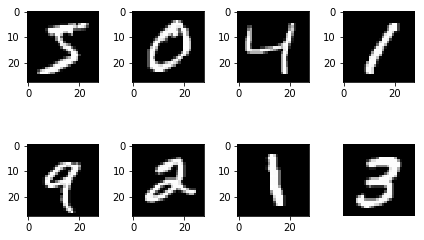

In [28]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [39]:
#create the network
import NeuralNetwork as NN
reload(NN)
NeuralNetwork = NN.NeuralNetwork

In [40]:
my_mnist_net = NeuralNetwork(784, 30, 10, iterations=30, learning_rate=0.1)

<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [41]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  10.57


<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

In [43]:
#train your network 
my_mnist_net.train(training_data, validation_data)

#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)

Iteration:  1/30[==============] -Error: 0.1363460899  -Training_Accuracy:  86.36, Val acc: 87.10, -time: 15.32 
Iteration:  2/30[==============] -Error: 0.0760875033  -Training_Accuracy:  89.54, Val acc: 89.79, -time: 29.58 
Iteration:  3/30[==============] -Error: 0.0631017375  -Training_Accuracy:  90.88, Val acc: 90.90, -time: 44.36 
Iteration:  4/30[==============] -Error: 0.0551564613  -Training_Accuracy:  91.80, Val acc: 91.45, -time: 59.42 
Iteration:  5/30[==============] -Error: 0.0506652646  -Training_Accuracy:  92.43, Val acc: 92.02, -time: 74.11 
Iteration:  6/30[==============] -Error: 0.0470116153  -Training_Accuracy:  92.95, Val acc: 92.66, -time: 89.08 
Iteration:  7/30[==============] -Error: 0.0444473083  -Training_Accuracy:  93.34, Val acc: 93.01, -time: 103.63 
Iteration:  8/30[==============] -Error: 0.0420034126  -Training_Accuracy:  93.47, Val acc: 93.06, -time: 117.43 
Iteration:  9/30[==============] -Error: 0.0403850664  -Training_Accuracy:  93.87, Val acc: 93

(array([ 86.356,  89.54 ,  90.876,  91.798,  92.428,  92.946,  93.34 ,
         93.466,  93.87 ,  94.016,  94.158,  94.31 ,  94.4  ,  94.736,
         94.92 ,  94.99 ,  95.15 ,  95.164,  95.296,  95.398,  95.472,
         95.72 ,  95.722,  95.844,  95.938,  96.02 ,  95.848,  96.126,
         96.184,  96.17 ]),
 array([ 87.1 ,  89.79,  90.9 ,  91.45,  92.02,  92.66,  93.01,  93.06,
         93.35,  93.38,  93.62,  93.61,  93.62,  93.97,  94.24,  94.1 ,
         94.2 ,  94.1 ,  94.3 ,  94.44,  94.47,  94.58,  94.56,  94.56,
         94.66,  94.71,  94.56,  94.63,  94.87,  94.71]))

In [13]:
#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/model_" + str(784) + "_" + str(30) + "_" + str(10) + "_" + str(0.1) + "epoch_" + "10.model")

### Comment

Accuracy increase after each iteration but slower by time so does the validation accuracy. The accuracy converges through each iteration. Validation accuracy remains high that shows the model is not overfiting. 

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


In [14]:
# plot test image func
def plotTestImg(img):
    plt.imshow(img, cmap='gray')  # cmap='gray' is for black and white picture.
    plt.axis('off')  # do not show axis value
    plt.tight_layout()   # automatic padding between subplots
    plt.show()

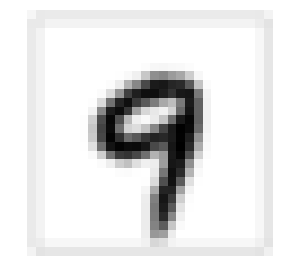

('TRUE LABEL:', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
('PREDICT LABEL', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))


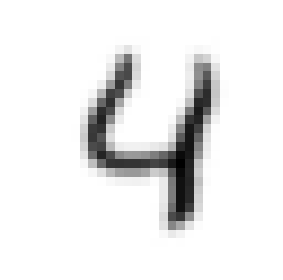

('TRUE LABEL:', array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]))
('PREDICT LABEL', array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]))


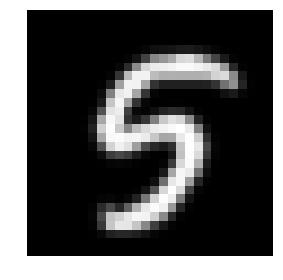

('TRUE LABEL:', array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]))
('PREDICT LABEL', array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]))
number of right predict: 3 / 3


In [99]:
#Your implementation goes here
from os import listdir
from os.path import isfile, join
from scipy import misc

def checkImage(img):
    c = 0 
    for i in range(0,28):
        for j in range(0,28):
            if img[i][j]<0.5:
                c+=1
    if(c > 28*14):
        return False
    return True
def convert(img):
    for i in range(0,28):
        for j in range(0,28):
            img[i][j] = 255-img[i][j]
    return img

def predictMNISTFolder(folder_path):
        folder_data = []
        bmpFiles = [f for f in listdir(folder_path) if isfile(join(folder_path, f)) and (".bmp" in f) ]
        for bmpFile in bmpFiles:
            img = misc.imread(join(folder_path, bmpFile), flatten=True)
            img = misc.imresize(img, (28,28))
            if (checkImage(img)):
                img = convert(img)
            img = np.reshape(img, (28*28, 1))
            label = np.zeros(10)
            label[int(bmpFile[0])] = 1
            folder_data.append((img, label))
        return my_mnist_net.predictWithLabel(folder_data)

predict_label = predictMNISTFolder("./Images_test/")   

i = 0
bmpFiles = [f for f in listdir("./Images_test/") if isfile(join("./Images_test/", f)) and (".bmp" in f) ]
for bmpFile in bmpFiles:
    img = misc.imread(join("./Images_test/", bmpFile), flatten=True)
    img = misc.imresize(img, (28,28))
    plotTestImg(img)
    label = np.zeros(10)
    label[int(bmpFile[0])] = 1
    print("TRUE LABEL:",label.astype(int))
    print('PREDICT LABEL',predict_label[1][i])
    i += 1
print('number of right predict: %d / %d'%(predict_label[0],3))



### COMMENT

All pictures are predicted wrong because it is not matching with database. Those pictures have light background and black character. That is a reason why the prediction is wrong. We create a function to check whether the picture's background is white or back based on our heristic opinion: pixels of background have to cover more than pixels of numbers. Afterthat, we inverted the image and test on our model. We obtains every good result( pass all the tests)

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

In [100]:
def plotAcc(accLines):
    plt.figure(figsize=(20,10))
    xVal = np.arange(len(accLines[0])) + 1
    plt.plot(xVal, accLines[0], 'b-', label="Training Accuracies")
    plt.plot(xVal, accLines[1], 'r-', label="Validation Accuracies")    
    plt.show()
        
def validateModelByLearningRate(lr_array):
    for lr in lr_array:
        nn_mnist_model = NeuralNetwork(28*28, 30, 10, learning_rate=lr, iterations=50)
        training_acc, validation_acc = nn_mnist_model.train(training_data, validation_data)
        plotAcc([training_acc, validation_acc])

Iteration:  1/50[==============] -Error: 0.3812147415  -Training_Accuracy:  41.86, Val acc: 42.75, -time: 13.37 
Iteration:  2/50[==============] -Error: 0.3017801745  -Training_Accuracy:  49.26, Val acc: 49.22, -time: 26.59 
Iteration:  3/50[==============] -Error: 0.2801422336  -Training_Accuracy:  52.78, Val acc: 52.50, -time: 40.41 
Iteration:  4/50[==============] -Error: 0.2623102880  -Training_Accuracy:  55.69, Val acc: 55.53, -time: 53.54 
Iteration:  5/50[==============] -Error: 0.2478455890  -Training_Accuracy:  59.13, Val acc: 59.31, -time: 71.68 
Iteration:  6/50[==============] -Error: 0.2355194670  -Training_Accuracy:  61.25, Val acc: 61.72, -time: 87.32 
Iteration:  7/50[==============] -Error: 0.2253999073  -Training_Accuracy:  63.58, Val acc: 63.96, -time: 100.17 
Iteration:  8/50[==============] -Error: 0.2167414491  -Training_Accuracy:  64.91, Val acc: 65.34, -time: 112.77 
Iteration:  9/50[==============] -Error: 0.2092521841  -Training_Accuracy:  66.19, Val acc: 66

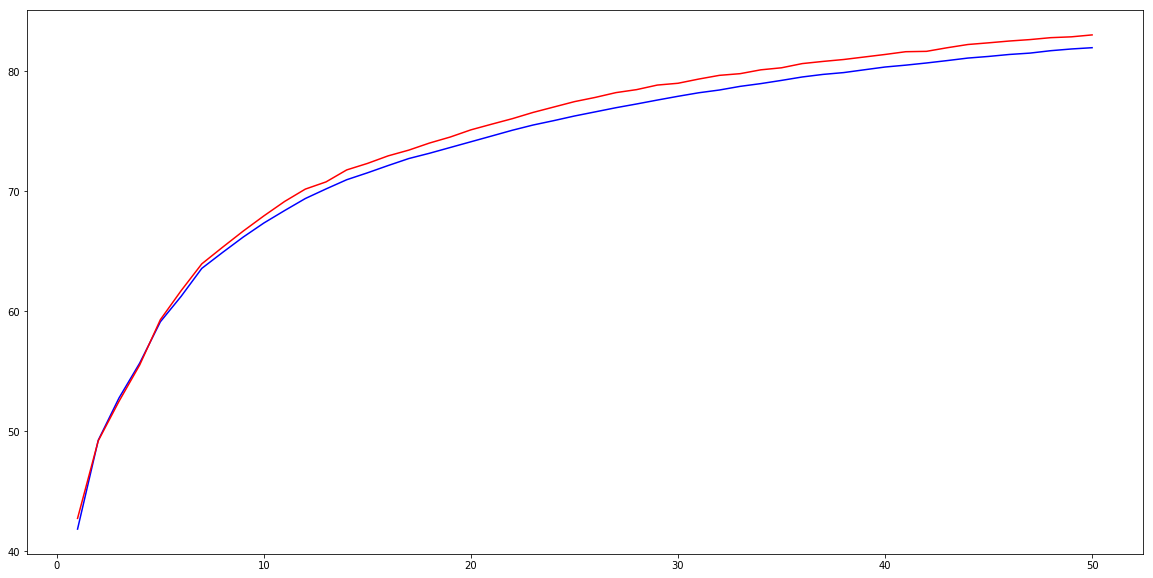

In [64]:
#Your implementation with a learning rate of 0.001 goes here 
lr_array = [0.001] #, 0.1, 1.0, 10]
validateModelByLearningRate(lr_array)

Iteration:  1/50[==============] -Error: 0.1378616936  -Training_Accuracy:  86.03, Val acc: 86.54, -time: 12.62 
Iteration:  2/50[==============] -Error: 0.0760409930  -Training_Accuracy:  89.11, Val acc: 89.47, -time: 25.25 
Iteration:  3/50[==============] -Error: 0.0630315956  -Training_Accuracy:  90.79, Val acc: 90.73, -time: 37.83 
Iteration:  4/50[==============] -Error: 0.0565965070  -Training_Accuracy:  91.47, Val acc: 91.17, -time: 50.56 
Iteration:  5/50[==============] -Error: 0.0515647240  -Training_Accuracy:  92.04, Val acc: 91.78, -time: 63.23 
Iteration:  6/50[==============] -Error: 0.0481845532  -Training_Accuracy:  92.62, Val acc: 92.13, -time: 75.86 
Iteration:  7/50[==============] -Error: 0.0460421217  -Training_Accuracy:  93.16, Val acc: 92.47, -time: 88.46 
Iteration:  8/50[==============] -Error: 0.0427923948  -Training_Accuracy:  93.46, Val acc: 92.68, -time: 101.01 
Iteration:  9/50[==============] -Error: 0.0412245545  -Training_Accuracy:  93.50, Val acc: 92.

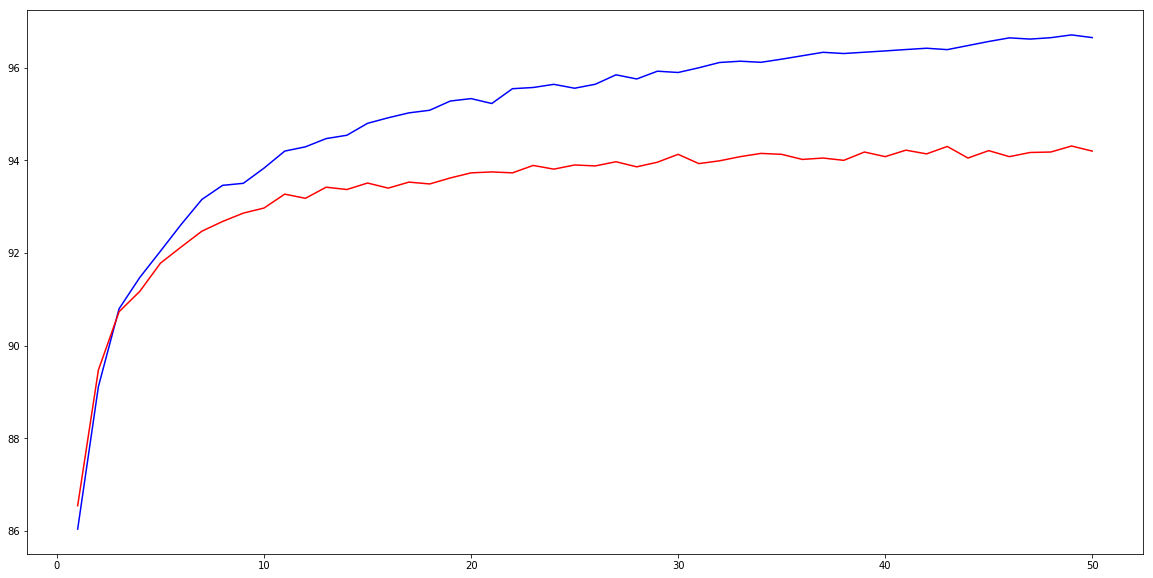

In [65]:
lr_array = [0.1] #, 0.1, 1.0, 10]
validateModelByLearningRate(lr_array)

Iteration:  1/50[==============] -Error: 0.0895715972  -Training_Accuracy:  88.98, Val acc: 88.94, -time: 12.61 
Iteration:  2/50[==============] -Error: 0.0595383012  -Training_Accuracy:  91.63, Val acc: 91.66, -time: 25.45 
Iteration:  3/50[==============] -Error: 0.0523667769  -Training_Accuracy:  92.73, Val acc: 92.84, -time: 38.06 
Iteration:  4/50[==============] -Error: 0.0489406739  -Training_Accuracy:  92.89, Val acc: 92.60, -time: 50.69 
Iteration:  5/50[==============] -Error: 0.0463180056  -Training_Accuracy:  92.83, Val acc: 92.89, -time: 63.32 
Iteration:  6/50[==============] -Error: 0.0434049019  -Training_Accuracy:  93.43, Val acc: 92.80, -time: 75.89 
Iteration:  7/50[==============] -Error: 0.0414033851  -Training_Accuracy:  94.05, Val acc: 93.59, -time: 88.52 
Iteration:  8/50[==============] -Error: 0.0397597247  -Training_Accuracy:  94.02, Val acc: 93.75, -time: 101.20 
Iteration:  9/50[==============] -Error: 0.0391637557  -Training_Accuracy:  93.96, Val acc: 93.

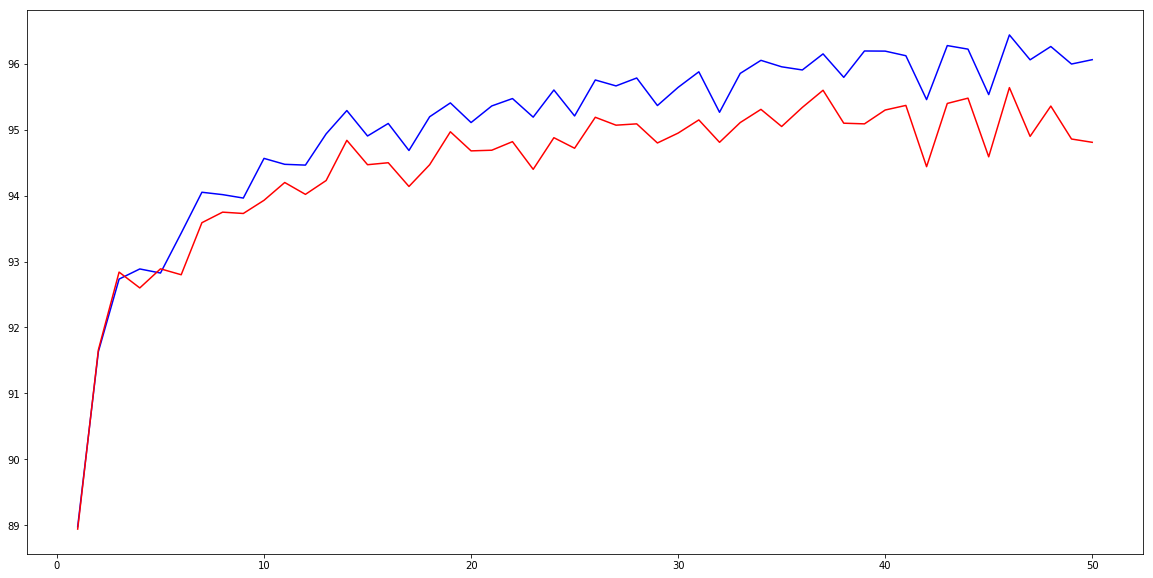

In [66]:
#Your implementation with a learning rate of 1.0 goes here 
lr_array = [1.0]
validateModelByLearningRate(lr_array)

Iteration:  1/50[==============] -Error: 0.3829774693  -Training_Accuracy:  16.91, Val acc: 16.52, -time: 12.73 
Iteration:  2/50[==============] -Error: 0.3845310255  -Training_Accuracy:  13.00, Val acc: 12.25, -time: 26.87 
Iteration:  3/50[==============] -Error: 0.3750837428  -Training_Accuracy:  16.27, Val acc: 16.62, -time: 39.59 
Iteration:  4/50[==============] -Error: 0.3801808777  -Training_Accuracy:  11.94, Val acc: 11.61, -time: 52.43 
Iteration:  5/50[==============] -Error: 0.3749996804  -Training_Accuracy:  14.00, Val acc: 13.41, -time: 65.16 
Iteration:  6/50[==============] -Error: 0.3707341115  -Training_Accuracy:  11.51, Val acc: 11.56, -time: 77.91 
Iteration:  7/50[==============] -Error: 0.3640833541  -Training_Accuracy:  11.23, Val acc: 11.09, -time: 90.58 
Iteration:  8/50[==============] -Error: 0.3749997457  -Training_Accuracy:  11.02, Val acc: 10.92, -time: 103.43 
Iteration:  9/50[==============] -Error: 0.3772964872  -Training_Accuracy:  11.27, Val acc: 11.

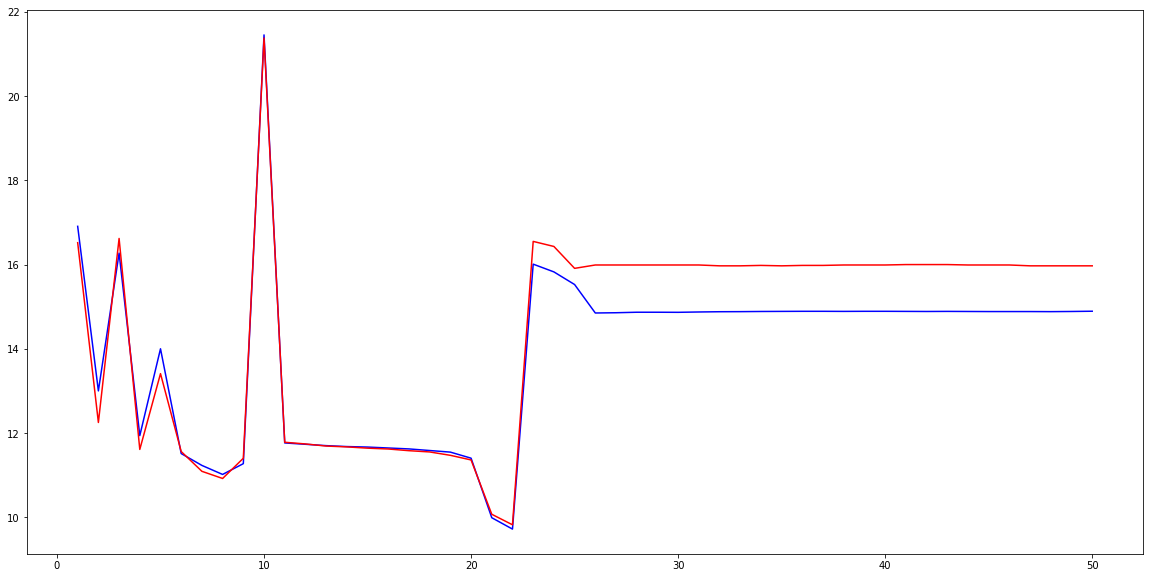

In [67]:
#Your implementation with a learning rate of 10 goes here 
lr_array = [10]
validateModelByLearningRate(lr_array)

Iteration:  1/50[==============] -Error: 0.3744751007  -Training_Accuracy:  33.53, Val acc: 35.03, -time: 12.71 
Iteration:  2/50[==============] -Error: 0.3010276189  -Training_Accuracy:  45.78, Val acc: 48.33, -time: 25.39 
Iteration:  3/50[==============] -Error: 0.2809099414  -Training_Accuracy:  52.26, Val acc: 54.90, -time: 38.06 
Iteration:  4/50[==============] -Error: 0.2638656041  -Training_Accuracy:  57.21, Val acc: 59.73, -time: 50.75 
Iteration:  5/50[==============] -Error: 0.2491838333  -Training_Accuracy:  60.25, Val acc: 62.76, -time: 63.67 
Iteration:  6/50[==============] -Error: 0.2366466861  -Training_Accuracy:  62.75, Val acc: 65.30, -time: 76.37 
Iteration:  7/50[==============] -Error: 0.2264661654  -Training_Accuracy:  64.56, Val acc: 66.89, -time: 89.01 
Iteration:  8/50[==============] -Error: 0.2166018406  -Training_Accuracy:  65.88, Val acc: 68.38, -time: 101.71 
Iteration:  9/50[==============] -Error: 0.2084801454  -Training_Accuracy:  67.06, Val acc: 69.

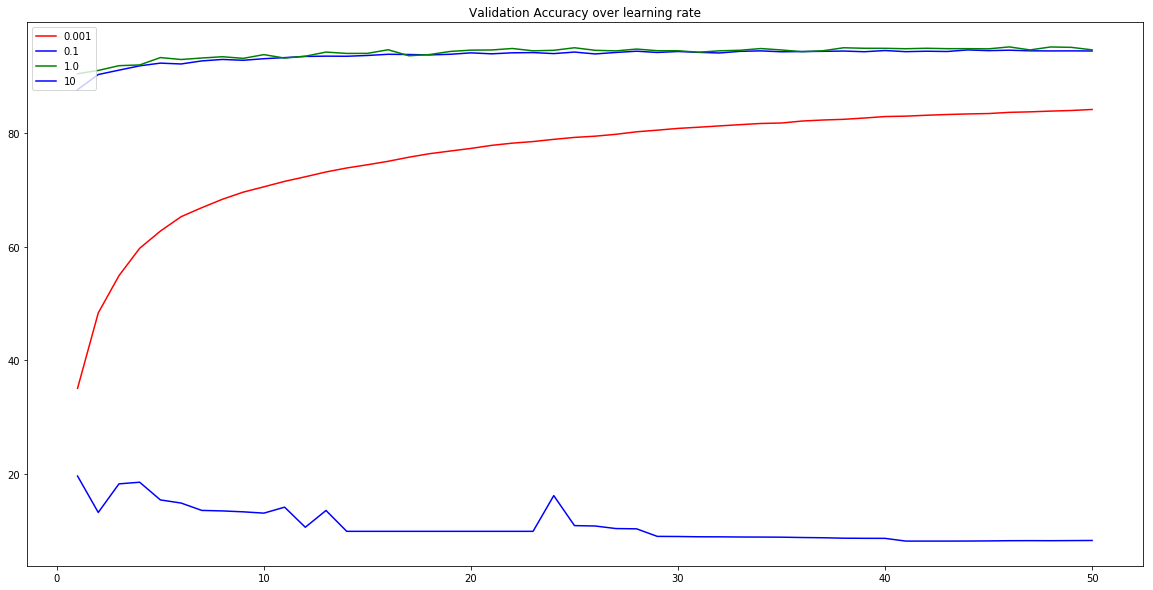

In [78]:
def plotAcc(accLines,color,label):
    xVal = np.arange(len(accLines[0])) + 1
    plt.plot(xVal, accLines[1], color, label=str(label))    
        
def validateModelByLearningRate(lr_array,lr_color):
    i = 0
    for lr in lr_array:
        nn_mnist_model = NeuralNetwork(28*28, 30, 10, learning_rate=lr, iterations=50)
        training_acc, validation_acc = nn_mnist_model.train(training_data, validation_data)
        plotAcc([training_acc, validation_acc],lr_color[i],lr)
        i += 1

lr_array = [0.001, 0.1, 1.0, 10]        
lr_color = ['r-','b-','g-','b-']
plt.figure(figsize=(20,10))
validateModelByLearningRate(lr_array,lr_color)
plt.legend(loc='upper left')
plt.title('Validation Accuracy over learning rate')
plt.show()

### COMMENT

With small learning rate (0.01), the accuracy converge slowly. In contrast, the accuracy cannot converge with large learning rate (100). From the graph, it is better to choose learning rate = 0.1 because with learning rate = 1, the accuracy fluctuate considerably even the trend still increase by time. Finally, after the same iteration, learning rate = 1 cannot obtain better solution than learning rate = 0.1.

From this experiment, we conclude that learning rate is one of the most important factor to train good model.

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

Iteration:  1/50[==============] -Error: 0.3144747667  -Training_Accuracy:  37.60, Val acc: 37.94, -time: 12.54 
Iteration:  2/50[==============] -Error: 0.2335743633  -Training_Accuracy:  55.27, Val acc: 55.25, -time: 25.04 
Iteration:  3/50[==============] -Error: 0.2218276069  -Training_Accuracy:  57.54, Val acc: 57.39, -time: 37.59 
Iteration:  4/50[==============] -Error: 0.2160039402  -Training_Accuracy:  57.07, Val acc: 56.92, -time: 50.12 
Iteration:  5/50[==============] -Error: 0.2136695742  -Training_Accuracy:  58.28, Val acc: 57.65, -time: 68.16 
Iteration:  6/50[==============] -Error: 0.2127493835  -Training_Accuracy:  57.65, Val acc: 57.01, -time: 82.68 
Iteration:  7/50[==============] -Error: 0.2118092057  -Training_Accuracy:  59.53, Val acc: 58.66, -time: 95.26 
Iteration:  8/50[==============] -Error: 0.2112809020  -Training_Accuracy:  58.63, Val acc: 58.10, -time: 107.85 
Iteration:  9/50[==============] -Error: 0.2100466726  -Training_Accuracy:  58.87, Val acc: 58.

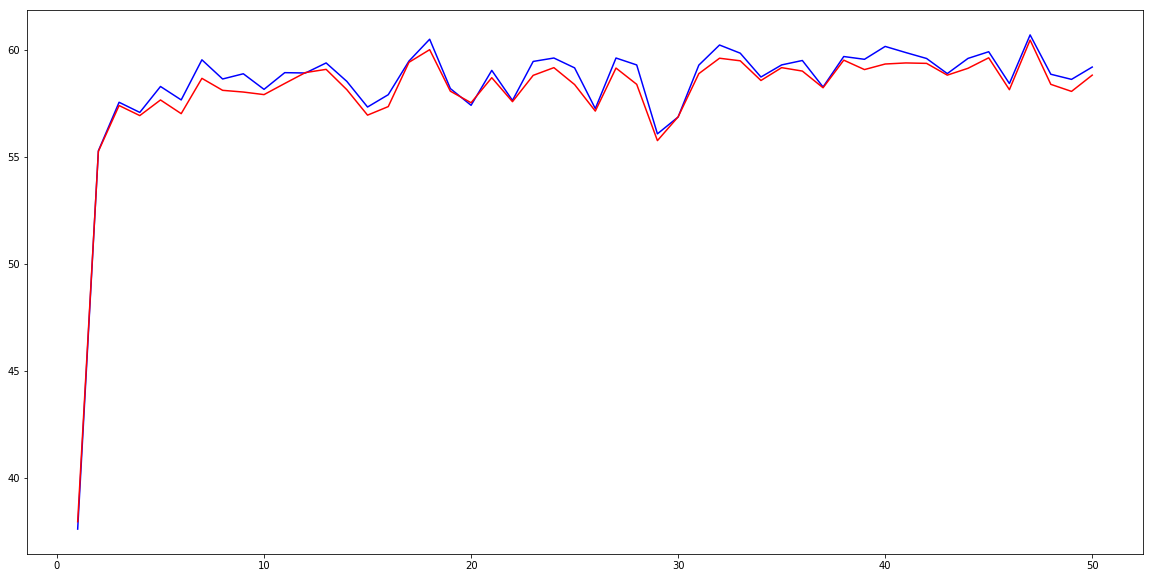

In [82]:
#Your implementation goes here
zero_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.1, iterations=50)
zero_net.weights_initialisation(np.zeros((28*28 + 1, 30)), np.zeros((31,10)))
training_acc, val_acc = zero_net.train(training_data, validation_data)
plotAcc([training_acc, val_acc])

### COMMENT

If all weight = 0, that means w'x=0 and all of values after activation function = 1/(1+e^-0) = 1/2. Except the update of output layer, the update weights of other layers are 0. That means only weight of last layer will be changed with same amount of delta weight. That's why in this experiment, accuracy increase slightly and then converge. 

In conclusion, we need to randomize the weight in initialization step to avoid this situation

<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

Iteration:  1/50[==============] -Error: 0.9667843561  -Training_Accuracy:  55.83, Val acc: 56.64, -time: 10.68 
Iteration:  2/50[==============] -Error: 0.8056405112  -Training_Accuracy:  66.23, Val acc: 66.05, -time: 21.34 
Iteration:  3/50[==============] -Error: 0.7534885454  -Training_Accuracy:  71.59, Val acc: 72.03, -time: 31.98 
Iteration:  4/50[==============] -Error: 0.7263084858  -Training_Accuracy:  82.52, Val acc: 83.33, -time: 42.62 
Iteration:  5/50[==============] -Error: 0.7032970166  -Training_Accuracy:  79.00, Val acc: 79.95, -time: 56.98 
Iteration:  6/50[==============] -Error: 0.6948014110  -Training_Accuracy:  86.75, Val acc: 87.44, -time: 69.60 
Iteration:  7/50[==============] -Error: 0.6875654803  -Training_Accuracy:  85.05, Val acc: 86.19, -time: 82.13 
Iteration:  8/50[==============] -Error: 0.6842493872  -Training_Accuracy:  85.78, Val acc: 86.32, -time: 92.84 
Iteration:  9/50[==============] -Error: 0.6815937624  -Training_Accuracy:  82.26, Val acc: 82.6

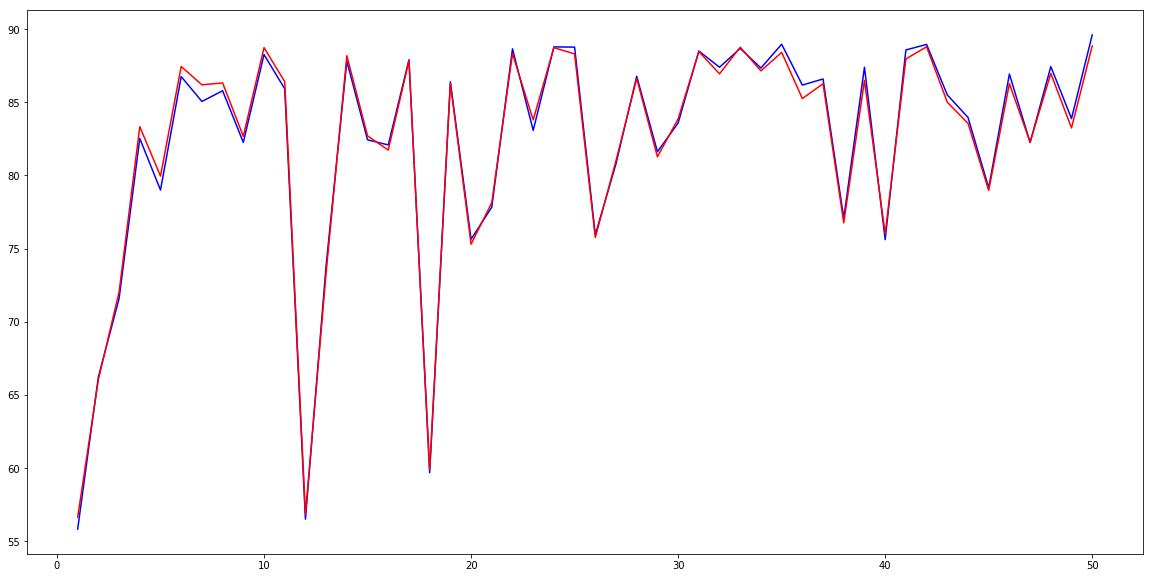

In [101]:
#Your implementation goes here
from transfer_functions import *

tanh_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.1, iterations=50)
tanh_net.set_transfer_function(tanh, dtanh)
training_acc, val_acc = tanh_net.train(training_data, validation_data)
plotAcc([training_acc, val_acc])

### COMMENT

The tanh transfer function perform worse than sigmoid function. (89.80% and 94% accuracy correpondingly). In our opinion, transfer function is based on the problem to decide with one will perform better


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

Iteration:  1/50[==============] -Error: 0.1038164582  -Training_Accuracy:  89.09, Val acc: 89.21, -time: 18.98 
Iteration:  2/50[==============] -Error: 0.0676585780  -Training_Accuracy:  91.21, Val acc: 90.99, -time: 38.06 
Iteration:  3/50[==============] -Error: 0.0553064301  -Training_Accuracy:  92.52, Val acc: 92.23, -time: 57.12 
Iteration:  4/50[==============] -Error: 0.0479753240  -Training_Accuracy:  93.63, Val acc: 92.77, -time: 76.15 
Iteration:  5/50[==============] -Error: 0.0434095785  -Training_Accuracy:  94.13, Val acc: 93.53, -time: 95.22 
Iteration:  6/50[==============] -Error: 0.0394634460  -Training_Accuracy:  94.62, Val acc: 93.88, -time: 114.54 
Iteration:  7/50[==============] -Error: 0.0372465671  -Training_Accuracy:  94.98, Val acc: 93.98, -time: 133.58 
Iteration:  8/50[==============] -Error: 0.0338201330  -Training_Accuracy:  95.16, Val acc: 94.10, -time: 152.67 
Iteration:  9/50[==============] -Error: 0.0321021600  -Training_Accuracy:  95.57, Val acc: 9

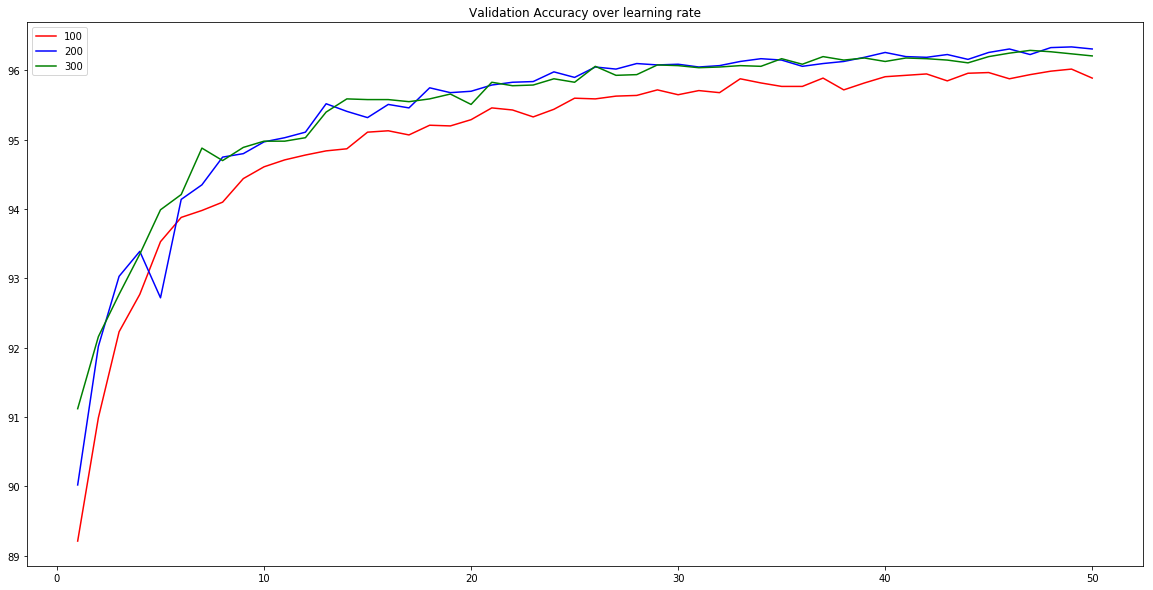

In [80]:
#Your implementation goes here
plt.figure(figsize=(20,10))
hiddenLayer = [100, 200, 300]
color = ['r-','b-','g-']
j = 0
for i in hiddenLayer:
    h_net = NeuralNetwork(28*28, i, 10, learning_rate=0.1, iterations=50)
    train_acc, val_acc = h_net.train(training_data, validation_data)
    plotAcc([train_acc, val_acc],color[j],i)
    j+=1
plt.legend(loc='upper left')
plt.title('Validation Accuracy over learning rate')
plt.show()

### COMMENT

increasing number of nodes in hidden layer, accuracy increases on training data set but it does not affect to accuracy on validation data. That means our model trends to be overfiting with training data incase increasing number of nodes.

From this experiment, we learnt that we should choose suitable number of nodes for the problem. In this case, we choose 100 nodes. To avoid overfitting, we can use additional methods like regularization or cross-validation to choose the best model. 

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



In [76]:
# Your implementation goes here
import NeuralNetwork2Hidden as NN2H


NeuralNetwork2Hidden = NN2H.NeuralNetwork2Hidden

NN2H_net = NeuralNetwork2Hidden(28*28, 70, 50, 10, iterations=50, learning_rate=0.1)
train_acc, val_acc = NN2H_net.train(training_data, validation_data)
plotAcc([train_acc, val_acc])


Iteration:  1/50[==============] -Error: 0.1907701093  -Training_Accuracy:  86.45, Val acc: 87.24, -time: 19.91 
Iteration:  2/50[==============] -Error: 0.0679126838  -Training_Accuracy:  90.83, Val acc: 90.67, -time: 41.43 
Iteration:  3/50[==============] -Error: 0.0509265246  -Training_Accuracy:  92.66, Val acc: 92.21, -time: 59.92 
Iteration:  4/50[==============] -Error: 0.0427610498  -Training_Accuracy:  93.70, Val acc: 93.03, -time: 78.50 
Iteration:  5/50[==============] -Error: 0.0377169901  -Training_Accuracy:  94.41, Val acc: 93.53, -time: 99.28 
Iteration:  6/50[==============] -Error: 0.0341937494  -Training_Accuracy:  94.93, Val acc: 93.66, -time: 122.09 
Iteration:  7/50[==============] -Error: 0.0316167424  -Training_Accuracy:  95.23, Val acc: 93.92, -time: 141.96 
Iteration:  8/50[==============] -Error: 0.0292623205  -Training_Accuracy:  95.75, Val acc: 94.25, -time: 160.76 
Iteration:  9/50[==============] -Error: 0.0273391057  -Training_Accuracy:  95.89, Val acc: 9

### COMMENT

The result is quite high with training set but the accuracy on validation set is quite similar. That mean the network is overfitting with training set. In addition, the training time is longer, accouting for 1303s, than model with 1 hidden layer, 936s with same hyperparameter 